In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a = np.arange(8)
b = a[4:6]
b[:] = 40
c = a[4] + a[6]
c

46

In [2]:
import re
s = 'ABCAC'
s

'ABCAC'

In [3]:
#len(re.search('A', s)) == 2

In [4]:
bool(re.match('A', s)) == True

True

In [5]:
re.match('A', s) == True

False

In [6]:
len(re.split('A', s)) == 2

False

In [7]:
def result():
    s = 'ACAABAACAAABACDBADDDFSDDDFFSSSASDAFAAACBAAAFASD'

    result = []
    # compete the pattern below
    pattern = "(\w)(?=[A]{3})"
    for item in re.finditer(pattern, s):
      # identify the group number below.
      result.append(item.group())
      
    return result

result()

['C', 'F', 'B']

In [8]:
S = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])

print(S[['b', 'c', 'd']])

print(S[S <= 3][S > 0])

print(S[1:4])

print(S['b':'e'])

b    1
c    2
d    3
dtype: int32
b    1
c    2
d    3
dtype: int32
b    1
c    2
d    3
dtype: int32
b    1
c    2
d    3
e    4
dtype: int32


In [9]:
df = pd.DataFrame([
    {'a':5,'b':6,'c':20},
    {'a':5,'b':82,'c':28},
    {'a':71,'b':31,'c':92},
    {'a':67,'b':37,'c':49}], 
    index=['R1', 'R2', 'R3','R4'])
df

,a,b,c
R1,5,6,20
R2,5,82,28
R3,71,31,92
R4,67,37,49


In [10]:
f = lambda x: x.max() + x.min()
df_new = df.apply(f)
df_new[1]


C:\Users\Bosideng\AppData\Local\Temp\ipykernel_15292\2493167355.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_new[1]


88

In [11]:
df = pd.DataFrame([
    {'Item':'item_1','Store':'A','Quantity sold':10},
    {'Item':'item_1','Store':'B','Quantity sold':20},
    {'Item':'item_1','Store':'C','Quantity sold':None},
    {'Item':'item_2','Store':'A','Quantity sold':5},
    {'Item':'item_2','Store':'B','Quantity sold':10},
    {'Item':'item_2','Store':'C','Quantity sold':15}])
df

,Item,Store,Quantity sold
0,item_1,A,10.0
1,item_1,B,20.0
2,item_1,C,NaN
3,item_2,A,5.0
4,item_2,B,10.0
5,item_2,C,15.0


In [12]:
df.groupby('Item').sum().iloc[0]['Quantity sold']

30.0

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

cities = pd.read_html("wikipedia_data.html")[1]
cities = cities.iloc[:-1, [0, 3, 5, 6, 7, 8]]
cities.rename(columns={"Population (2016 est.)[8]": "Population"},
              inplace=True)
cities['NFL'] = cities['NFL'].str.replace(r"\[.*\]", "")
cities['MLB'] = cities['MLB'].str.replace(r"\[.*\]", "")
cities['NBA'] = cities['NBA'].str.replace(r"\[.*\]", "")
cities['NHL'] = cities['NHL'].str.replace(r"\[.*\]", "")

Big4='NBA'

def nba_correlation():
    
    team = cities[Big4].str.extract('([A-Z]{0,2}[a-z0-9]*\ [A-Z]{0,2}[a-z0-9]*|[A-Z]{0,2}[a-z0-9]*)([A-Z]{0,2}[a-z0-9]*\ [A-Z]{0,2}[a-z0-9]*|[A-Z]{0,2}[a-z0-9]*)([A-Z]{0,2}[a-z0-9]*\ [A-Z]{0,2}[a-z0-9]*|[A-Z]{0,2}[a-z0-9]*)')
    team['Metropolitan area']=cities['Metropolitan area']
    team = pd.melt(team, id_vars=['Metropolitan area']).drop(columns=['variable']).replace("",np.nan).replace("—",np.nan).dropna().reset_index().rename(columns = {"value":"team"})
    team=pd.merge(team,cities,how='left',on = 'Metropolitan area').iloc[:,1:4]
    team = team.astype({'Metropolitan area': str, 'team': str, 'Population': int})
    team['team']=team['team'].str.replace('[\w.]*\ ','')

    _df=pd.read_csv("assets/"+str.lower(Big4)+".csv")
    _df = _df[_df['year'] == 2018]
    _df['team'] = _df['team'].str.replace(r'[\*]',"")
    _df['team'] = _df['team'].str.replace(r'\(\d*\)',"")
    _df['team'] = _df['team'].str.replace(r'[\xa0]',"")
    _df = _df[['team','W/L%']]
    _df['team'] = _df['team'].str.replace('[\w.]* ','')
    _df = _df.astype({'team': str,'W/L%': float})
    
    merge=pd.merge(team,_df,'outer', on = 'team')
    merge=merge.groupby('Metropolitan area').agg({'W/L%': np.nanmean, 'Population': np.nanmean})

    population_by_region = merge['Population'] # pass in metropolitan area population from cities
    win_loss_by_region = merge['W/L%'] # pass in win/loss ratio from _df in the same order as cities["Metropolitan area"]   

    assert len(population_by_region) == len(win_loss_by_region), "Q2: Your lists must be the same length"
    assert len(population_by_region) == 28, "Q2: There should be 28 teams being analysed for NBA"

    return stats.pearsonr(population_by_region, win_loss_by_region)[0]

In [14]:
rng = np.random.RandomState(1234)

rng.randn(5)



array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

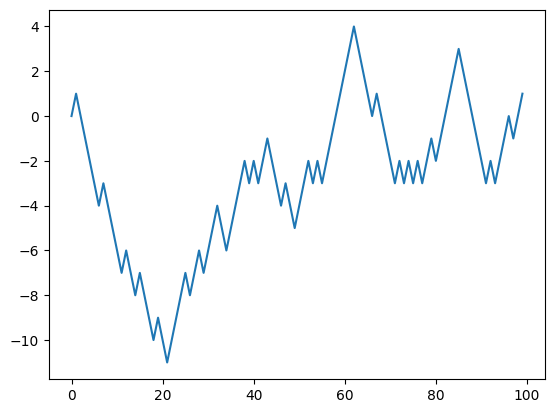

In [15]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])

In [16]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min()


-11

In [17]:
walk.max()

36

In [18]:
# Whatever the direction, the maximum steps for either positive or negative way.
(np.abs(walk) >= 10).argmax()

17

In [19]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[-1,  0,  1, ..., 20, 19, 18],
       [-1, -2, -1, ..., 24, 23, 24],
       [-1,  0, -1, ...,  8,  7,  8],
       ...,
       [-1,  0,  1, ..., 12, 11, 10],
       [-1, -2, -1, ..., 34, 33, 34],
       [-1, -2, -3, ..., 26, 25, 24]])

In [20]:
# maximum and minimum values obtained over all of the walks
walks.max()

111

In [21]:
# maximum and minimum values obtained over all of the walks
walks.min()

-111

In [22]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True, False,  True, ...,  True,  True, False])

In [23]:
 hits30.sum() # Number that hit 30 or -30

3376

In [24]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

crossing_times.mean()



498.7843601895735

In [25]:
steps = np.random.normal(loc=0, scale=0.25,size=(nwalks, nsteps))
steps

array([[-0.14134147,  0.52061462,  0.18673274, ..., -0.44829762,
         0.03156498, -0.08074484],
       [ 0.27133298, -0.22277103,  0.2897092 , ..., -0.00521076,
         0.21894441, -0.17897246],
       [ 0.2360714 , -0.20542261, -0.1117292 , ..., -0.02489877,
        -0.04409007,  0.51378219],
       ...,
       [-0.31719908, -0.09670508,  0.35301627, ..., -0.23491141,
        -0.17244447,  0.06662559],
       [ 0.33365016,  0.45782047,  0.21544351, ..., -0.11480882,
         0.30938798,  0.20015788],
       [-0.20505356, -0.08165958, -0.09085249, ..., -0.17545159,
         0.03546663, -0.31720151]])

In [26]:
# Getting started with pandas
import pandas as pd
from pandas import Series, DataFrame

In [27]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [28]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [29]:
obj.index # like range(4)

RangeIndex(start=0, stop=4, step=1)

In [30]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [31]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [32]:
obj2['a']

-5

In [33]:
data = {'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2], 
        'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002, 2003]}

In [34]:
frame = pd.DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002
5,3.2,Nevada,2003


In [35]:
frame.head() # default is the first 5 rows.

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [36]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 
                             'five', 'six'])

In [37]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [38]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [39]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [40]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [41]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [42]:
# Insert column into frame

frame2['debt'] = 16.5

In [43]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [44]:
frame2['debt'] = np.arange(6.)

In [45]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [46]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

frame2['debt'] = val

frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [47]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [48]:
from pandas import Index


del frame2['eastern']
frame2.columns
Index(['year', 'state', 'pop', 'debt'], dtype='object')

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [49]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [50]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [51]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [52]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [53]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}

pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [54]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [55]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [56]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

In [57]:
# https://numpy.org/doc/stable/reference/generated/numpy.dot.html

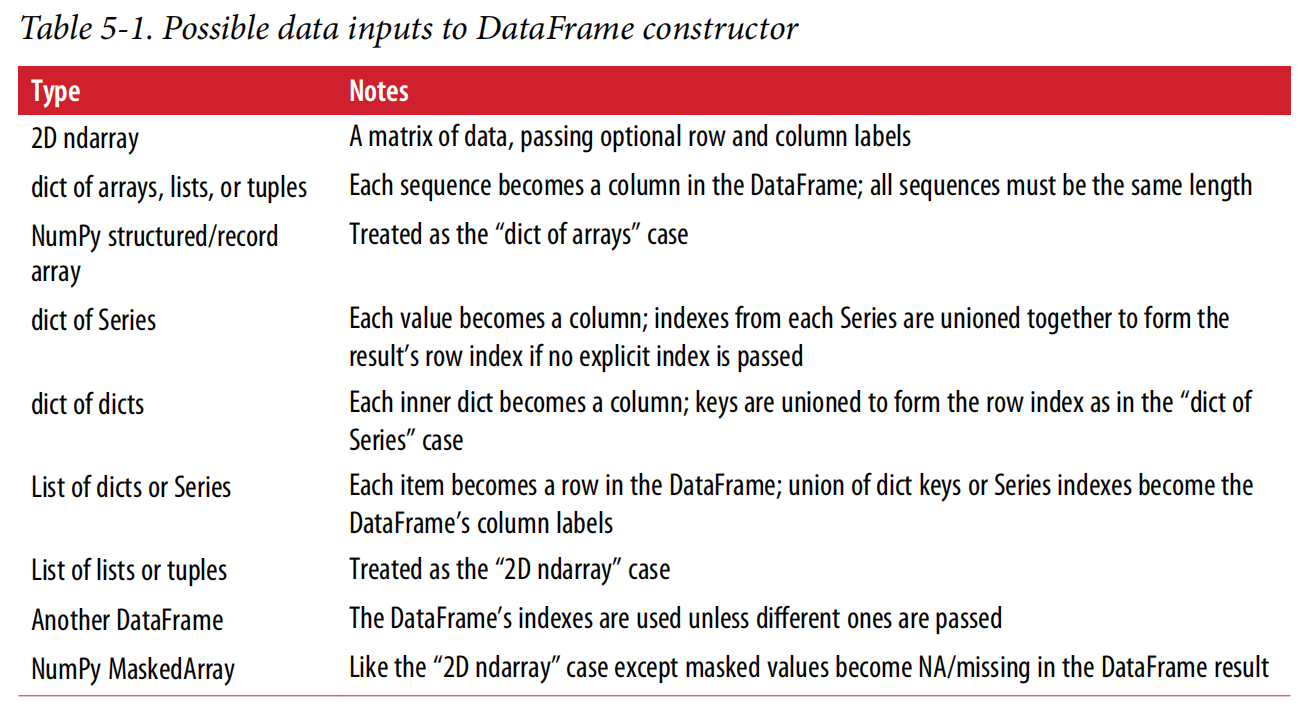

In [58]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

index = obj.index

index

Index(['a', 'b', 'c'], dtype='object')

In [65]:
index[1:]

Index(['b', 'c'], dtype='object')

In [66]:
labels = pd.Index(np.arange(3))

In [67]:
labels

Index([0, 1, 2], dtype='int32')

In [68]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)

obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [69]:
obj2.index is labels

True

In [70]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [71]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [72]:
'Ohio' in frame3.columns

True

In [75]:
2003 in frame3.index

False

In [76]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

In [77]:
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

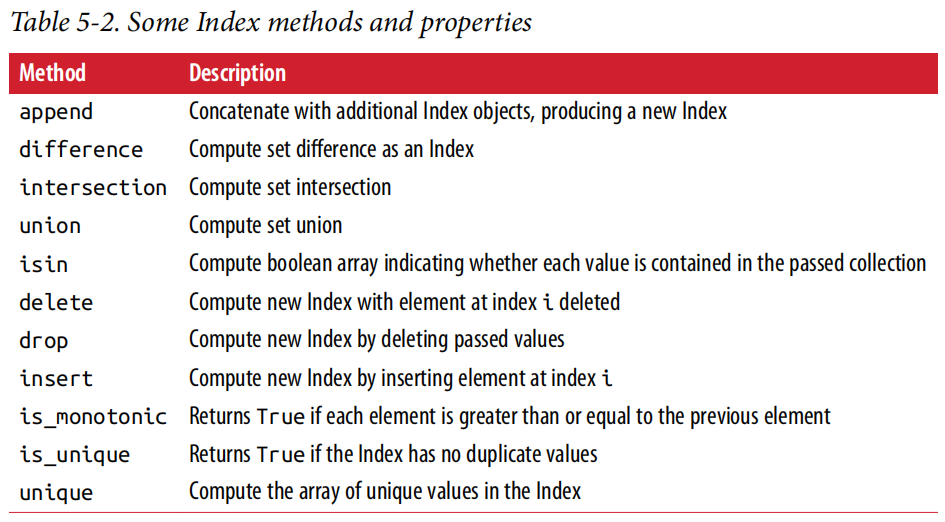

In [78]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [79]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [80]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [81]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object